<a href="https://colab.research.google.com/github/shartke/machine-learning/blob/main/Mnist_Digits_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINST digits
This is a digits example using tensor flow, taken from this tweet
https://twitter.com/svpino/status/1577267314914795521?t=3veXWhxSZMHMcYSxO8UigQ&s=19


In [2]:
import numpy as np
import pandas as pd
import random 
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [15]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_train = x_train.astype('float32') / 255.0

x_train.shape

(60000, 28, 28, 1)

In [16]:
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [19]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer = optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)
image = random.choice(x_test)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 2.3021 - accuracy: 0.1100
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3020 - accuracy: 0.1116
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3020 - accuracy: 0.1110
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3018 - accuracy: 0.1107
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 2.3019 - accuracy: 0.1103
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 2.3019 - accuracy: 0.1108
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 2.3018 - accuracy: 0.1109
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3019 - accuracy: 0.1107
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 2.3020 - accuracy: 0.1106
Epoch 10/10
1875/1875 [==============================] - 35s 18m

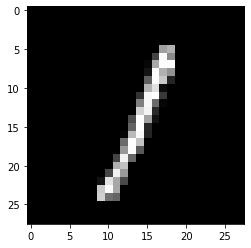

In [22]:
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()

In [23]:
image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255.0

In [25]:
digit = np.argmax(model.predict(image)[0], axis=-1)
print('Prediction: ', digit)

Prediction:  1
